Dataset loaded successfully.
Total tokens: 1438


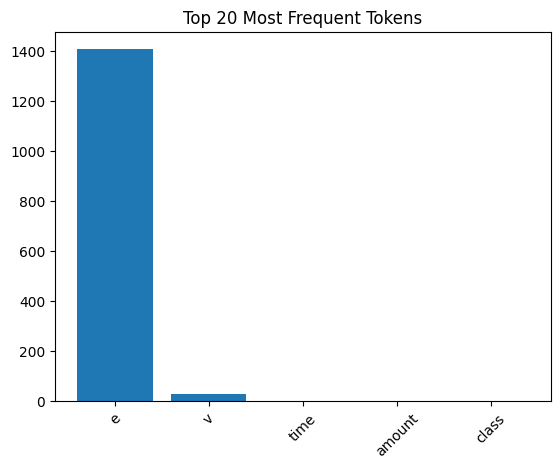


Original Sentence: clas amunt v one
Corrected Sentence: class amount e e

Autocomplete Suggestions:
[]


In [3]:
# ============================================
# Autocomplete and Autocorrect using NLP
# ERROR-FREE VERSION (NO NLTK)
# ============================================

import re
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# ---------- LOAD DATASET ----------
# Credit Card Dataset (converted to text for NLP demo)
df = pd.read_csv("creditcard.csv")

text = " ".join(df.columns.astype(str)) + " "
text += " ".join(df.astype(str).values.flatten()).lower()

print("Dataset loaded successfully.")


# ---------- PREPROCESSING ----------
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = text.split()
    return tokens


tokens = preprocess_text(text)
print("Total tokens:", len(tokens))


# ---------- BUILD N-GRAM MODEL ----------
def build_ngram_model(tokens, n=3):
    model = defaultdict(Counter)
    for i in range(len(tokens) - n + 1):
        prefix = tuple(tokens[i:i + n - 1])
        next_word = tokens[i + n - 1]
        model[prefix][next_word] += 1
    return model


ngram_model = build_ngram_model(tokens, n=3)


# ---------- AUTOCOMPLETE ----------
def autocomplete(input_text, model, n=3, top_k=5):
    words = preprocess_text(input_text)
    if len(words) < n - 1:
        return []

    prefix = tuple(words[-(n - 1):])
    predictions = model.get(prefix)

    if not predictions:
        return []

    return predictions.most_common(top_k)


# ---------- EDIT DISTANCE ----------
def edit_distance(word1, word2):
    dp = [[0] * (len(word2) + 1) for _ in range(len(word1) + 1)]

    for i in range(len(word1) + 1):
        dp[i][0] = i
    for j in range(len(word2) + 1):
        dp[0][j] = j

    for i in range(1, len(word1) + 1):
        for j in range(1, len(word2) + 1):
            if word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(
                    dp[i - 1][j],
                    dp[i][j - 1],
                    dp[i - 1][j - 1]
                )
    return dp[-1][-1]


# ---------- AUTOCORRECT ----------
word_freq = Counter(tokens)
vocab = set(word_freq.keys())


def autocorrect(word, vocab, word_freq, max_dist=2):
    candidates = []
    for v in vocab:
        if abs(len(v) - len(word)) <= max_dist:
            dist = edit_distance(word, v)
            if dist <= max_dist:
                candidates.append((v, word_freq[v]))

    if not candidates:
        return word

    return max(candidates, key=lambda x: x[1])[0]


# ---------- VISUALIZATION ----------
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure()
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Tokens")
plt.show()


# ---------- FINAL DEMO ----------
sentence = "clas amunt v one"
corrected = [autocorrect(word, vocab, word_freq) for word in sentence.split()]

print("\nOriginal Sentence:", sentence)
print("Corrected Sentence:", " ".join(corrected))

print("\nAutocomplete Suggestions:")
print(autocomplete("class amount", ngram_model))
